In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import warnings
warnings.filterwarnings("ignore")

In [3]:
cd Downloads

C:\Users\18329\Downloads


In [4]:
df= pd.read_excel('dfclean.xlsx')

In [5]:
df

,SAMPWEIGHT,AGE,SEX,RACEA,EDUC,Income,BMI,BWGTGRAM,Medicare
0,8702,17,Female,White,Eleven Grade,74999,0,2580,PreNatal
1,1486,17,Male,White,Eleven Grade,34999,0,3005,PreNatal
2,1406,16,Female,White,Ten Grade,74999,0,2438,PreNatal
3,3539,16,Female,White,Nine Grade,34999,0,2212,PreNatal
4,1274,16,Male,White,Eight Grade,74999,0,3402,No
...,...,...,...,...,...,...,...,...,...
13526,17224,16,Female,White,Nine Grade,100000,0,3431,PreNatal
13527,6416,17,Male,White,Ten Grade,100000,0,3799,PreNatal
13528,8137,17,Female,White,Eleven Grade,100000,0,3998,PreNatal
13529,4408,16,Female,Black,Ten Grade,99999,0,3714,PreNatal


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13531 entries, 0 to 13530
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SAMPWEIGHT  13531 non-null  int64 
 1   AGE         13531 non-null  int64 
 2   SEX         13531 non-null  object
 3   RACEA       13531 non-null  object
 4   EDUC        13531 non-null  object
 5   Income      13531 non-null  object
 6   BMI         13531 non-null  int64 
 7   BWGTGRAM    13531 non-null  int64 
 8   Medicare    13531 non-null  object
dtypes: int64(4), object(5)
memory usage: 951.5+ KB


In [7]:
num_df = df.select_dtypes(include=['int64','float'])
cat_df = df.select_dtypes(include=['object'])

<AxesSubplot:>

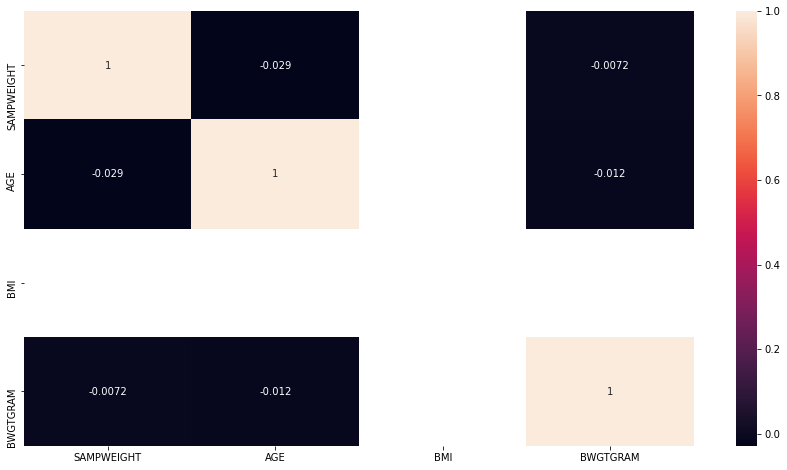

In [11]:
plt.subplots(figsize = (15,8))
sns.heatmap(num_df.corr(),annot= True)